In [1]:
#Import the required libraries
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Create a connector to connect the jupyter notebook to mysql server having a database named as project
con = mysql.connector.connect(host='localhost', port=3306, user='root', password='123789abc',database='project')

In [3]:
# Fetch(load) the data from the table studmarks(inside 'project' database) into pandas dataframe using connector con
df =pd.read_sql_query("select * from studmarks", con)

In [4]:
# Lets visualize the loaded data
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,1988-05-04,55,45,56,87,21,52,89,65
1,Suresh,M,1987-04-05,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-12-08,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-02-09,58,96,78,46,96,77,83,53
5,Annu,F,1988-05-04,45,87,52,89,55,89,87,52
6,pooja,F,1987-04-05,55,64,61,58,75,58,64,61
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
8,Farha,F,1990-12-08,55,63,89,75,78,75,63,89
9,Mukesh,M,1989-02-09,96,46,77,83,58,83,46,77


In [5]:
# As the table data from mysql has been loaded into pandas dataframe, we can close the connection
con.close();

# Exploratory Data Analysis

In [6]:
# Lets explore the first five rows of data
df.head()

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,1988-05-04,55,45,56,87,21,52,89,65
1,Suresh,M,1987-04-05,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-12-08,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-02-09,58,96,78,46,96,77,83,53


In [7]:
# Lets explore the shape of the data
df.shape

(10, 11)

In [8]:
#Lets explore data types of data
df.dtypes

Name         object
Gender       object
DOB          object
Maths         int64
Physics       int64
Chemistry     int64
English       int64
Biology       int64
Economics     int64
History       int64
Civics        int64
dtype: object

In [9]:
#Lets get more information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
Name         10 non-null object
Gender       10 non-null object
DOB          10 non-null object
Maths        10 non-null int64
Physics      10 non-null int64
Chemistry    10 non-null int64
English      10 non-null int64
Biology      10 non-null int64
Economics    10 non-null int64
History      10 non-null int64
Civics       10 non-null int64
dtypes: int64(8), object(3)
memory usage: 960.0+ bytes


In [10]:
#Lets check if there is any missing value
df.isnull().sum()

Name         0
Gender       0
DOB          0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
dtype: int64

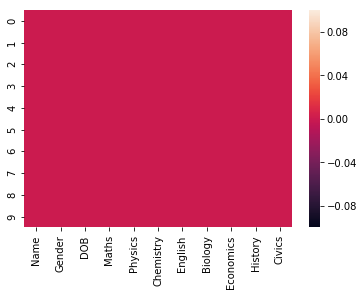

In [11]:
#Lets confirm missing values using heatmap
sns.heatmap(df.isnull())

In [12]:
#Lets explore the descriptive statistics of data
df.describe()
# We can clearly see that Maths have minimium average marks 
# Chemistry has maximum average marks
# Chemistry has minimum standard deviation i.e. marks have least spread in case of chemistry
# Civics have highest standard deviation i.e. marks have highest spread in case of civics
# Civics has highest range of 87 with maximum marks of 89 and minimum marks of 2

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


In [13]:
# Lets check who is the correlation among the data
df.corr()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
Maths,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629
Physics,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266
Chemistry,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908
English,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705
Biology,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060
Economics,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905
History,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686
Civics,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000


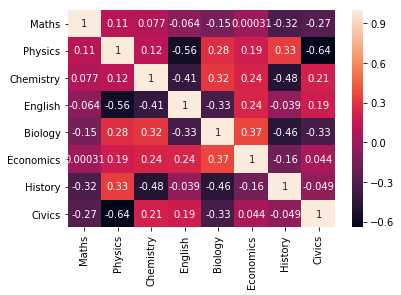

In [14]:
# Lets visulalize the correlation with help of heatmap
sns.heatmap(df.corr(),annot=True)
# we can see the subjects have positive correlation with few subjects while negative correlation with other subjects
# for example maths has postive correlation with physics,chemistry but negative with english and biology etc

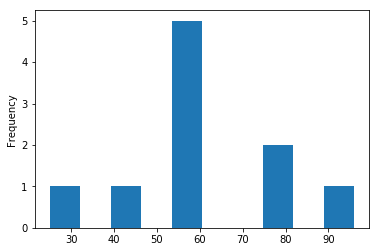

In [15]:
# Lets visualize the distribution of Maths marks
df['Maths'].plot.hist()
# we can see maximum students secured marks between 55 and 60

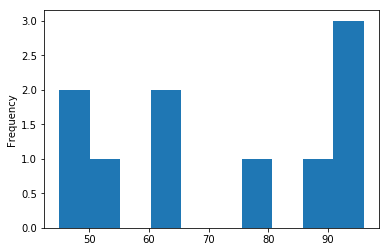

In [16]:
# Lets visualize the distribution of Physics marks
df['Physics'].plot.hist()


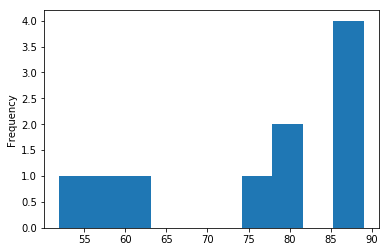

In [17]:
# Lets visualize the distribution of Chemistry marks
df['Chemistry'].plot.hist()

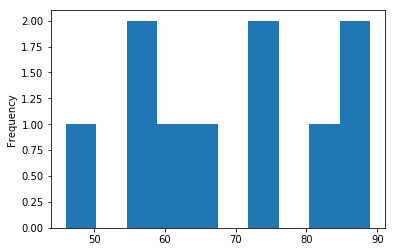

In [18]:
# Lets visualize the distribution of English marks
df['English'].plot.hist()

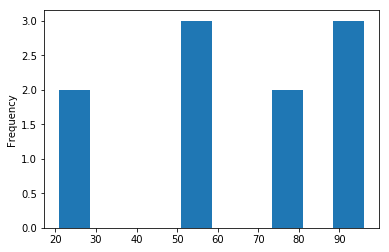

In [19]:
# Lets visualize the distribution of Biology marks
df['Biology'].plot.hist()

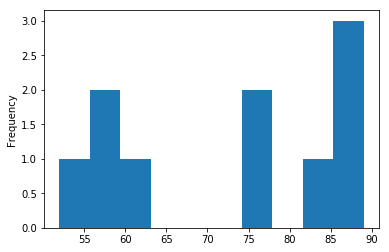

In [20]:
# Lets visualize the distribution of Economics marks
df['Economics'].plot.hist()

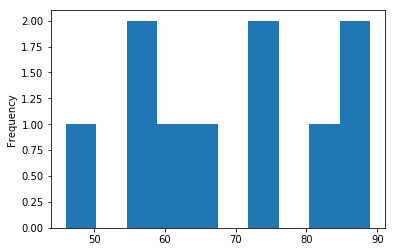

In [21]:
# Lets visualize the distribution of History marks
df['History'].plot.hist()

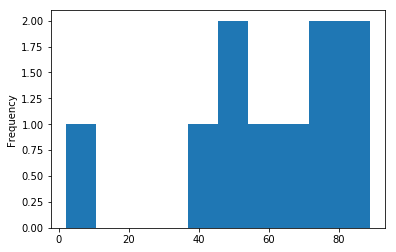

In [22]:
# Lets visualize the distribution of Civics marks
df['Civics'].plot.hist()

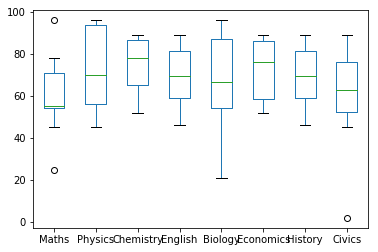

In [23]:
# Lets compare the distribution of marks with help of box plot
df.iloc[:,3:].plot.box()
# we can see the presence of two outliers in maths 
# we can see the presence of one outlier in civics
# Also we can see performance in chemistry and economics are better than other subjects

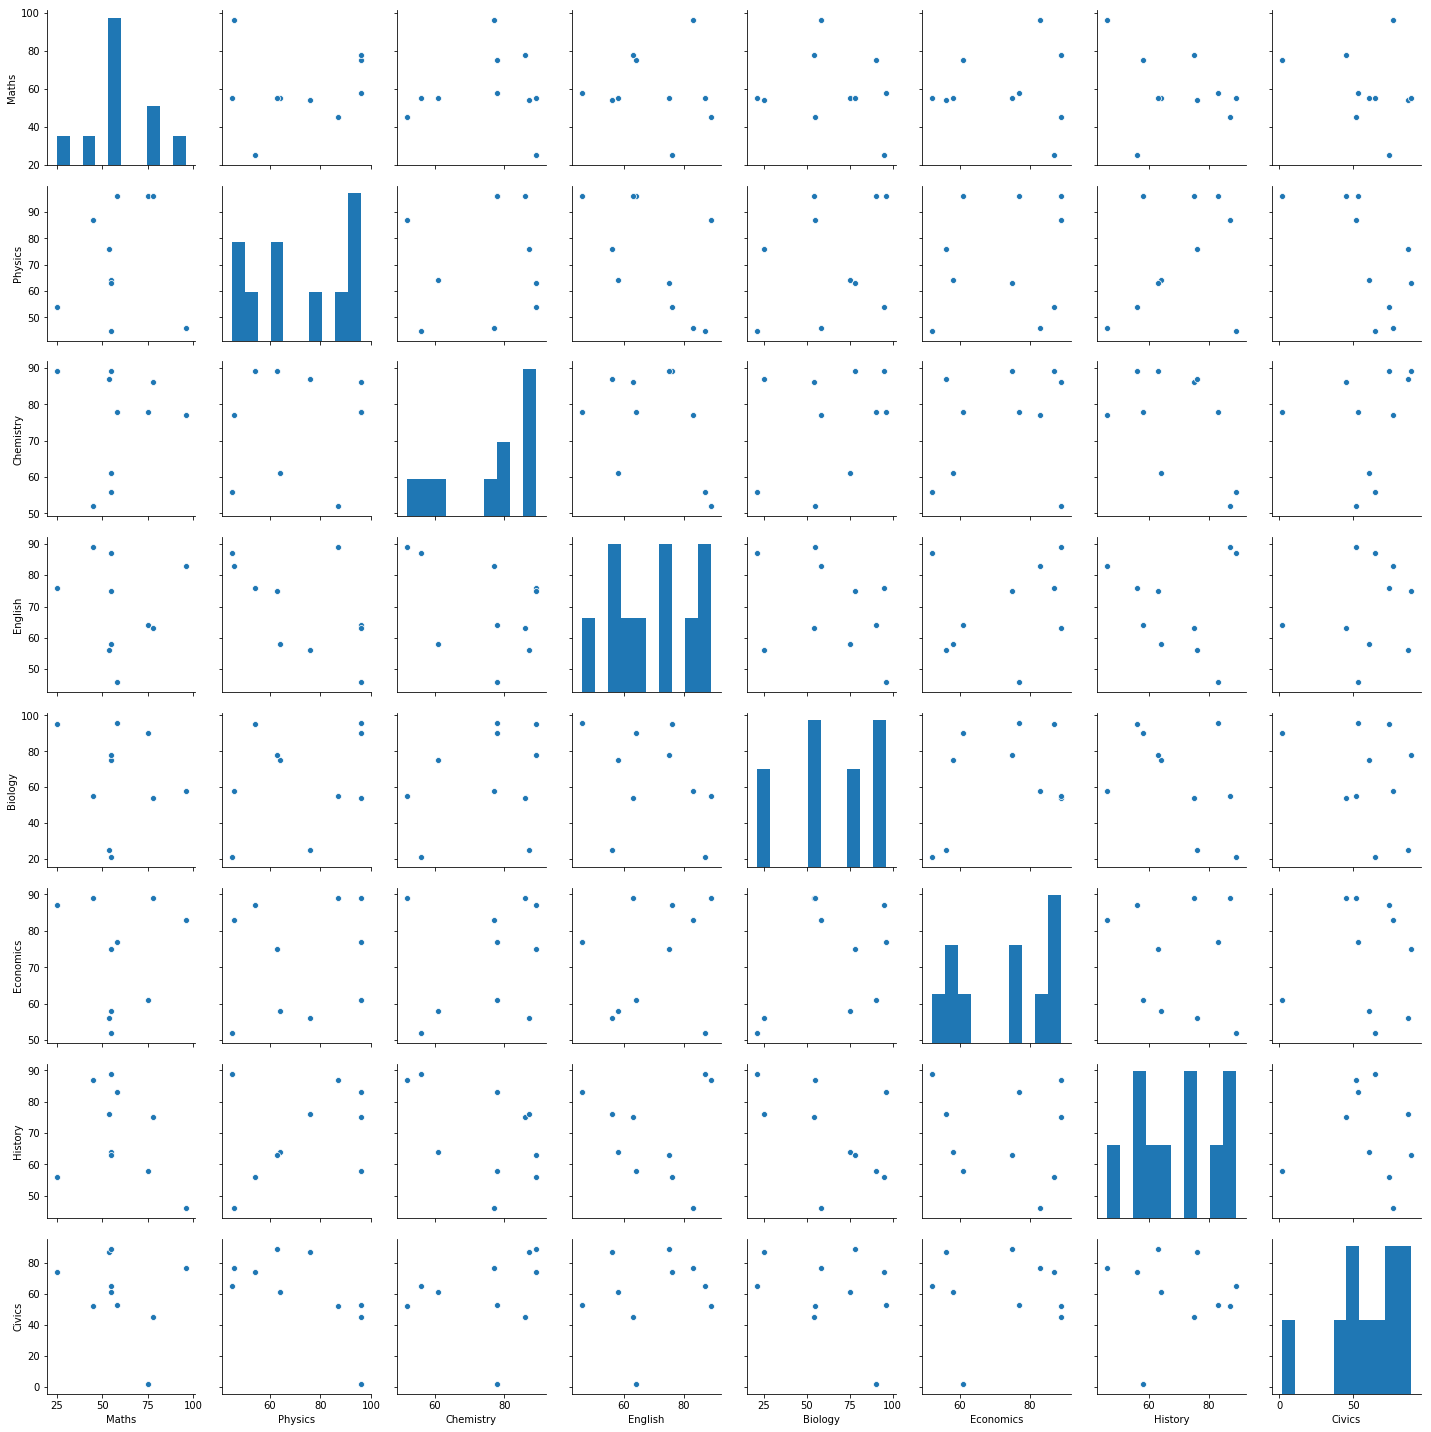

In [24]:
#we can also do visualation among different paramters of dataframe
sns.pairplot(df)

In [25]:
#Lets check the skewness in the data
df.iloc[:,3:].skew()

Maths        0.246964
Physics     -0.045336
Chemistry   -0.746462
English     -0.131222
Biology     -0.496446
Economics   -0.245555
History     -0.131222
Civics      -1.332448
dtype: float64

In [26]:
# Lets explore how many are males and how many are females
df['Gender'].value_counts()

M    5
F    5
Name: Gender, dtype: int64

In [27]:
# Lets add a new column with name total marks having total marks in all subjects

df['Total_Marks']= df.iloc[:,3:].sum(axis=1)

In [28]:
#Lets again check first five rows to confirm the new added column
df.head()

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total_Marks
0,John,M,1988-05-04,55,45,56,87,21,52,89,65,470
1,Suresh,M,1987-04-05,75,96,78,64,90,61,58,2,524
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74,556
3,Jessica,F,1990-12-08,78,96,86,63,54,89,75,45,586
4,Jennifer,F,1989-02-09,58,96,78,46,96,77,83,53,587


In [29]:
# Lets find how much are the maximum  total marks
df['Total_Marks'].max()

587

In [30]:
# Lets see who secured maximum total_marks
df[df['Total_Marks']==df['Total_Marks'].max()]
# There is a tie between Jennifer and Farha
# Interesting Fact: Both are the girls who secured maximum marks 

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total_Marks
4,Jennifer,F,1989-02-09,58,96,78,46,96,77,83,53,587
8,Farha,F,1990-12-08,55,63,89,75,78,75,63,89,587


In [31]:
# Lets see who secured minimum total_ marks
df[df['Total_Marks']==df['Total_Marks'].min()]
# John is the one who secured minimum marks

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total_Marks
0,John,M,1988-05-04,55,45,56,87,21,52,89,65,470


In [32]:
# Lets create a list of subjects
subjects = df.iloc[:,3:].columns
subjects


Index(['Maths', 'Physics', 'Chemistry', 'English', 'Biology', 'Economics',
       'History', 'Civics', 'Total_Marks'],
      dtype='object')

In [33]:
# Lets see the name of the topper of each subject WITH MARKS
for i in subjects:
    print('In subject',i,'the topper is/are')
    print(df[df[i] == df[i].max()]['Name'])
    print(' MARKS= ', df[i].max())
    print()
    print()
    
    
    

In subject Maths the topper is/are
9    Mukesh
Name: Name, dtype: object
 MARKS=  96


In subject Physics the topper is/are
1      Suresh
3     Jessica
4    Jennifer
Name: Name, dtype: object
 MARKS=  96


In subject Chemistry the topper is/are
2    Ramesh
8     Farha
Name: Name, dtype: object
 MARKS=  89


In subject English the topper is/are
5    Annu
Name: Name, dtype: object
 MARKS=  89


In subject Biology the topper is/are
4    Jennifer
Name: Name, dtype: object
 MARKS=  96


In subject Economics the topper is/are
3    Jessica
5       Annu
Name: Name, dtype: object
 MARKS=  89


In subject History the topper is/are
0    John
Name: Name, dtype: object
 MARKS=  89


In subject Civics the topper is/are
8    Farha
Name: Name, dtype: object
 MARKS=  89


In subject Total_Marks the topper is/are
4    Jennifer
8       Farha
Name: Name, dtype: object
 MARKS=  587




In [34]:
# Lets see the name of the MINIMUM SCORER of each subject WITH MARKS
for i in subjects:
    print('In subject',i,'the minimum scorer is/are')
    print(df[df[i] == df[i].min()]['Name'])
    print(' MARKS= ', df[i].min())
    print()
    print()

In subject Maths the minimum scorer is/are
2    Ramesh
Name: Name, dtype: object
 MARKS=  25


In subject Physics the minimum scorer is/are
0    John
Name: Name, dtype: object
 MARKS=  45


In subject Chemistry the minimum scorer is/are
5    Annu
Name: Name, dtype: object
 MARKS=  52


In subject English the minimum scorer is/are
4    Jennifer
Name: Name, dtype: object
 MARKS=  46


In subject Biology the minimum scorer is/are
0    John
Name: Name, dtype: object
 MARKS=  21


In subject Economics the minimum scorer is/are
0    John
Name: Name, dtype: object
 MARKS=  52


In subject History the minimum scorer is/are
9    Mukesh
Name: Name, dtype: object
 MARKS=  46


In subject Civics the minimum scorer is/are
1    Suresh
Name: Name, dtype: object
 MARKS=  2


In subject Total_Marks the minimum scorer is/are
0    John
Name: Name, dtype: object
 MARKS=  470


